In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

In [29]:
freshmen_df = pd.read_csv('./Freshmen.csv', sep=',')
print("Số chiều của bộ dữ liệu là: ", freshmen_df.shape)
freshmen_df

Số chiều của bộ dữ liệu là:  (100, 8)


,GPA,Miles from Home,College,Accommodations,Years Off,Part-Time Work Hours,Attends Office Hours,High School GPA
0,0.73,253,Social Sciences,Dorm,4,35,Sometimes,3.23
1,1.60,143,Social Sciences,Dorm,5,30,Never,2.35
2,2.17,171,Social Sciences,Dorm,0,25,Never,3.95
3,1.02,332,Sciences,Off-campus,5,30,Sometimes,3.44
4,3.14,112,Business,Dorm,0,25,Sometimes,3.20
...,...,...,...,...,...,...,...,...
95,3.63,118,Social Sciences,Dorm,1,35,Sometimes,3.09
96,2.51,34,Social Sciences,Dorm,0,30,Regularly,2.62
97,2.01,353,Social Sciences,Dorm,1,20,Regularly,3.01
98,2.33,388,Business,Dorm,4,20,Regularly,3.13


In [30]:
freshmen_df

,GPA,Miles from Home,College,Accommodations,Years Off,Part-Time Work Hours,Attends Office Hours,High School GPA
0,0.73,253,Social Sciences,Dorm,4,35,Sometimes,3.23
1,1.60,143,Social Sciences,Dorm,5,30,Never,2.35
2,2.17,171,Social Sciences,Dorm,0,25,Never,3.95
3,1.02,332,Sciences,Off-campus,5,30,Sometimes,3.44
4,3.14,112,Business,Dorm,0,25,Sometimes,3.20
...,...,...,...,...,...,...,...,...
95,3.63,118,Social Sciences,Dorm,1,35,Sometimes,3.09
96,2.51,34,Social Sciences,Dorm,0,30,Regularly,2.62
97,2.01,353,Social Sciences,Dorm,1,20,Regularly,3.01
98,2.33,388,Business,Dorm,4,20,Regularly,3.13


In [31]:
freshmen_df_dummies = pd.get_dummies(freshmen_df, drop_first=True)
freshmen_df_dummies.head()

,GPA,Miles from Home,Years Off,Part-Time Work Hours,High School GPA,College_Engineering,College_Liberal Arts,College_Sciences,College_Social Sciences,Accommodations_Off-campus,Accommodations_Other,Attends Office Hours_Regularly,Attends Office Hours_Sometimes
0,0.73,253,4,35,3.23,0,0,0,1,0,0,0,1
1,1.60,143,5,30,2.35,0,0,0,1,0,0,0,0
2,2.17,171,0,25,3.95,0,0,0,1,0,0,0,0
3,1.02,332,5,30,3.44,0,0,1,0,1,0,0,1
4,3.14,112,0,25,3.20,0,0,0,0,0,0,0,1


In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

def scale_columns(df, cols):
    for col in cols:
        df[col] = pd.DataFrame(ss.fit_transform(pd.DataFrame(df[col])), columns=[col])
    return df
freshmen_scaled = scale_columns(freshmen_df_dummies, freshmen_df_dummies.columns[1:5])
freshmen_arr = freshmen_scaled.to_numpy()

In [33]:
freshmen_arr_train = {
    "data": freshmen_arr[:70, 1:],
    "target": freshmen_arr[:70, 0]
}

freshmen_arr_test = {
    "data": freshmen_arr[70:, 1:],
    "target": freshmen_arr[70:, 0]
}

In [34]:
knn_regr = KNeighborsRegressor(n_neighbors=1, p=2)
knn_regr.fit(freshmen_arr_train["data"], freshmen_arr_train["target"])
y_pred = knn_regr.predict(freshmen_arr_test["data"])

print("Print results for 5 test data samples in test:")
print("Predicted GPA: ", y_pred[:5])
print("Real GPA:         ", freshmen_arr_test["target"][:5])

Print results for 5 test data samples in test:
Predicted GPA:  [3.27 3.12 1.81 1.72 0.35]
Real GPA:          [2.57 2.8  1.33 1.73 2.25]


In [35]:
print(f'Using 1 neighbor, mean squared error: {mean_squared_error(freshmen_arr_test["target"], y_pred)}')

Using 1 neighbor, mean squared error: 1.3301733333333334


In [36]:
error_list = []
for quantity in range(1, 51):
    knn_regr = KNeighborsRegressor(n_neighbors=quantity, p=2)
    knn_regr.fit(freshmen_arr_train["data"], freshmen_arr_train["target"])
    y_pred = knn_regr.predict(freshmen_arr_test["data"])
    error_list.append(mean_squared_error(freshmen_arr_test["target"], y_pred))


Text(0.5, 0, 'Number of Neighbors used in KNeighborsRegressor')

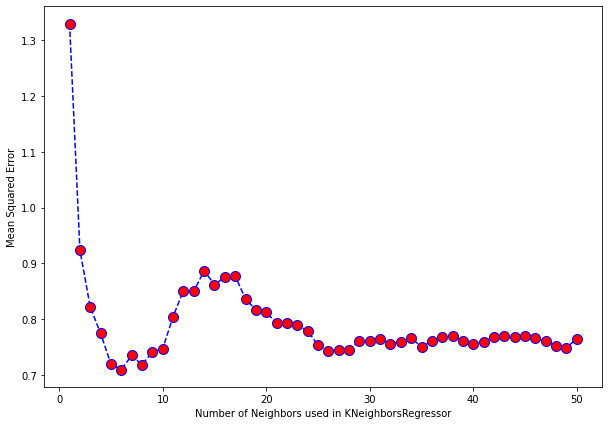

In [37]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 51), error_list, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.ylabel("Mean Squared Error")
plt.xlabel("Number of Neighbors used in KNeighborsRegressor")

In [38]:
knn_regr = KNeighborsRegressor(n_neighbors=6, p=2)
knn_regr.fit(freshmen_arr_train["data"], freshmen_arr_train["target"])
y_pred = knn_regr.predict(freshmen_arr_test["data"])

print("Print results for 5 test data samples in test:")
print("Predicted GPA: ", y_pred[:5])
print("Real GPA:     ", freshmen_arr_test["target"][:5])

Print results for 5 test data samples in test:
Predicted GPA:  [2.52       2.00666667 2.23166667 2.17166667 1.32      ]
Real GPA:      [2.57 2.8  1.33 1.73 2.25]


In [39]:
print(f'Using 6 neighbors, mean squared error: {mean_squared_error(freshmen_arr_test["target"], y_pred)}')

Using 6 neighbors, mean squared error: 0.7094427777777774
